# Compute Results.ipynb
This notebook helps to calculate the per-class results for overleaf

In [8]:
import os
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score

In [9]:
# Dataset
TSV = r'C:\Users\ChenYi\Downloads\AAI3001_Project\labels\IEMOCAP_4.tsv'
AUDIO_DIRECTORY = r'C:\Users\ChenYi\Downloads\AAI3001_Project\small-project\IEMOCAP_full_release_audio'

# Contains the correct transcription provided by the IEMOCAP dataset
GROUND_TRUTH = './groundtruth_IEMOCAP.csv'

# Contains the correct emotions (A, H, S, N) remapped to positive, negative and neutral
REMAPPED_EMOTIONS = './sentiment_truths_IEMOCAP.csv'

# Filepaths
LOG_OUTPUT = './per-class-results.log'

PYTHON_SCRIPT = False

In [10]:
import logging
def get_logger(filename, verbosity=1, name=None):
    level_dict = {0: logging.DEBUG, 1: logging.INFO, 2: logging.WARNING}
    formatter = logging.Formatter("[%(asctime)s][%(filename)s][line:%(lineno)d][%(levelname)s] %(message)s")
    logger = logging.getLogger(name)
    logger.setLevel(level_dict[verbosity])

    fh = logging.FileHandler(filename, "w")
    fh.setFormatter(formatter)                                                                                                                                                                                     
    logger.addHandler(fh)                                                                                                                                                                                          
                                                                                                                                                                                                                   
    sh = logging.StreamHandler()                                                                                                                                                                                   
    sh.setFormatter(formatter)                                                                                                                                                                                     
    logger.addHandler(sh)                                                                                                                                                                                          
                                                                                                                                                                                                                   
    return logger
logger = get_logger(LOG_OUTPUT)

## Setup Global Variables

In [11]:
all_positive_accuracy = []
all_neutral_accuracy = []
all_negative_accuracy = []

all_positive_f1 = []
all_neutral_f1 = []
all_negative_f1 = []

## Evaluation Function

In [12]:
# Function to perform accuracy evaluation
def calculate_accuracy(dataframe, FOLD):
    logger.info(f"------ Now calculating accuracy for fold {FOLD} ------")
    
    # Read the reference truth file
    reference = pd.read_csv(REMAPPED_EMOTIONS)

    # Merge DataFrames on 'filename'
    df_merged = pd.merge(
        reference[['filename', 'remapped_sentiment']],
        dataframe[['ID', 'sentiment']],
        left_on='filename',
        right_on='ID'
    )
    
    # dataframe contacts the files used in the test split (~500)
    # reference contains all files in the IEMOCAP dataset
    # df_merged will be a dataframe that contains only the specific files from that fold, and the corresponding truth from the reference

    # Extract true labels and predictions
    y_true = dataframe['sentiment']
    y_pred = df_merged['remapped_sentiment']
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a DataFrame for the confusion matrix
    labels = sorted(y_true.unique())

    
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    
    # Do not show CM when running as a python script
    if not PYTHON_SCRIPT:
     
        # Plot the confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
        plt.ylabel('Actual Labels')
        plt.xlabel('Predicted Labels')
        plt.title('Confusion Matrix')
        plt.show()
    
    # Compute and print UA score
    macro_recall = recall_score(y_true, y_pred, average='macro')
    logger.info(f"Test UA: {macro_recall}")
    
    logger.info("Confusion Matrix:")
    logging.info(f"\n{cm_df}")

    # Generate classification report
    report = classification_report(y_true, y_pred, labels=labels)
    logger.info("Classification Report:")
    logging.info(f"\n{report}")
    
    # Generate classification report in dictonary form
    report = classification_report(y_true, y_pred, labels=labels, output_dict=True)
    
    # Access specific metrics
    positive_recall = report["positive"]["recall"]
    positive_f1 = report["positive"]["f1-score"]
    neutral_recall = report["neutral"]["recall"] 
    neutral_f1 = report["neutral"]["f1-score"] 
    negative_recall = report["negative"]["recall"]
    negative_f1 = report["negative"]["f1-score"]

    # Log values
    logger.info(f"Positive Recall:   {positive_recall}")
    logger.info(f"Positive F1-score: {positive_f1}")
    logger.info(f"Neutral Recall:    {neutral_recall}")
    logger.info(f"Neutral F1-score:  {neutral_f1}")
    logger.info(f"Negative Recall:   {negative_recall}")
    logger.info(f"Negative F1-score: {negative_f1}")
    
    # Add to list
    all_positive_accuracy.append(positive_recall)
    all_neutral_accuracy.append(neutral_recall)
    all_negative_accuracy.append(negative_recall)

    all_positive_f1.append(positive_f1)
    all_neutral_f1.append(neutral_f1)
    all_negative_f1.append(negative_f1)

[2025-06-03 20:35:47,562][3446969155.py][line:3][INFO] ------ Now calculating accuracy for fold 0 ------
[2025-06-03 20:35:47,562][3446969155.py][line:3][INFO] ------ Now calculating accuracy for fold 0 ------


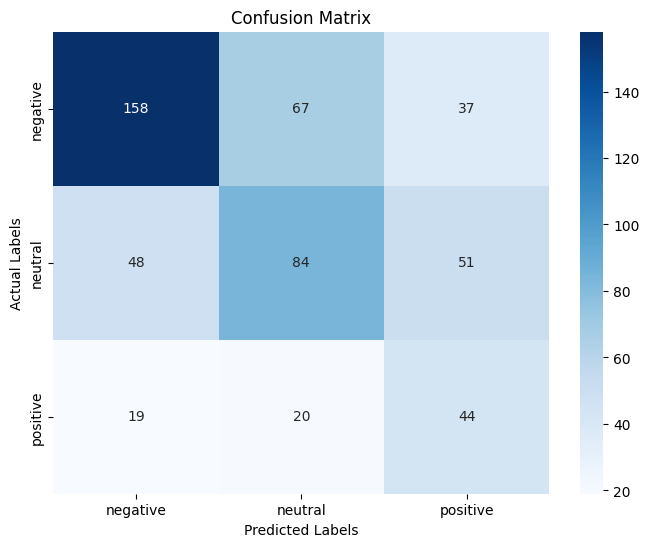

[2025-06-03 20:35:47,686][3446969155.py][line:46][INFO] Test UA: 0.530730103494946
[2025-06-03 20:35:47,686][3446969155.py][line:46][INFO] Test UA: 0.530730103494946
[2025-06-03 20:35:47,688][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:47,688][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:47,691][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       158       67        37
neutral         48       84        51
positive        19       20        44
[2025-06-03 20:35:47,691][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       158       67        37
neutral         48       84        51
positive        19       20        44
[2025-06-03 20:35:47,708][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:47,708][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:47,710][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   support

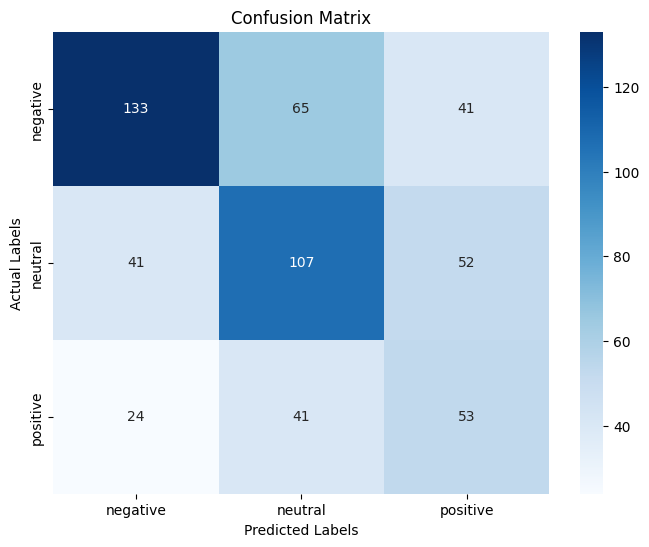

[2025-06-03 20:35:47,940][3446969155.py][line:46][INFO] Test UA: 0.513545966007139
[2025-06-03 20:35:47,940][3446969155.py][line:46][INFO] Test UA: 0.513545966007139
[2025-06-03 20:35:47,941][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:47,941][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:47,944][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       133       65        41
neutral         41      107        52
positive        24       41        53
[2025-06-03 20:35:47,944][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       133       65        41
neutral         41      107        52
positive        24       41        53
[2025-06-03 20:35:47,960][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:47,960][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:47,962][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   support

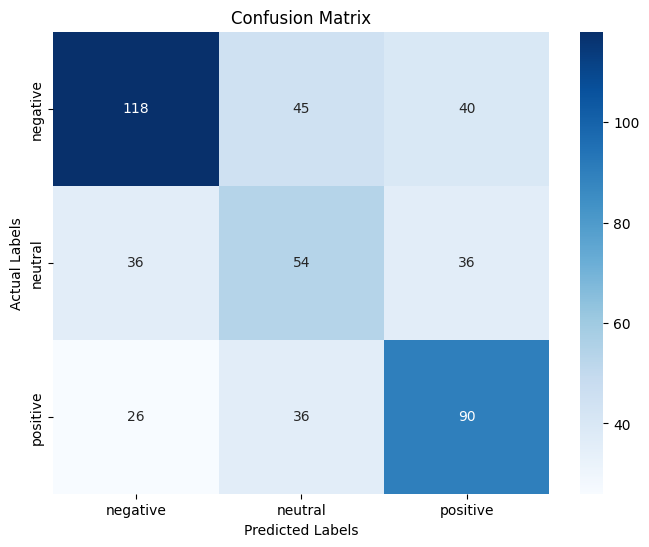

[2025-06-03 20:35:48,115][3446969155.py][line:46][INFO] Test UA: 0.5339858266355544
[2025-06-03 20:35:48,115][3446969155.py][line:46][INFO] Test UA: 0.5339858266355544
[2025-06-03 20:35:48,117][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:48,117][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:48,119][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       118       45        40
neutral         36       54        36
positive        26       36        90
[2025-06-03 20:35:48,119][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       118       45        40
neutral         36       54        36
positive        26       36        90
[2025-06-03 20:35:48,135][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:48,135][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:48,137][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   suppo

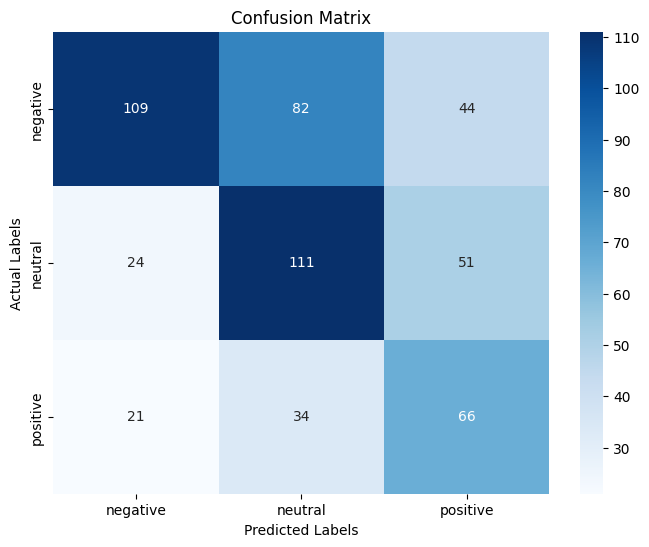

[2025-06-03 20:35:48,308][3446969155.py][line:46][INFO] Test UA: 0.5353528420789917
[2025-06-03 20:35:48,308][3446969155.py][line:46][INFO] Test UA: 0.5353528420789917
[2025-06-03 20:35:48,316][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:48,316][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:48,318][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       109       82        44
neutral         24      111        51
positive        21       34        66
[2025-06-03 20:35:48,318][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       109       82        44
neutral         24      111        51
positive        21       34        66
[2025-06-03 20:35:48,333][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:48,333][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:48,335][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   suppo

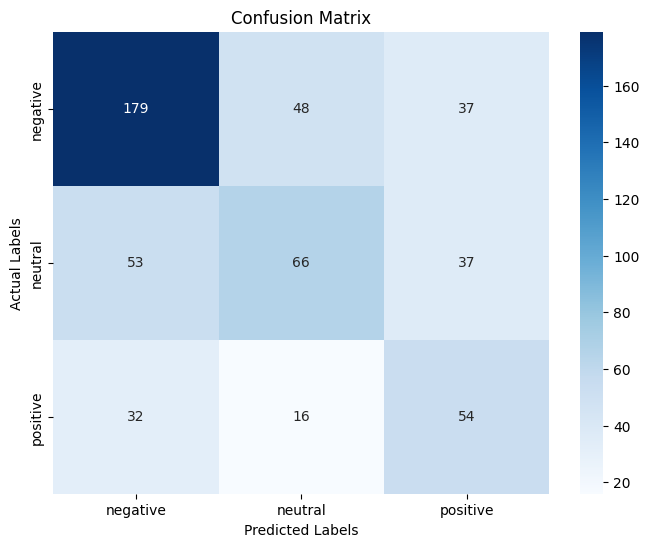

[2025-06-03 20:35:48,507][3446969155.py][line:46][INFO] Test UA: 0.5435063302710361
[2025-06-03 20:35:48,507][3446969155.py][line:46][INFO] Test UA: 0.5435063302710361
[2025-06-03 20:35:48,509][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:48,509][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:48,512][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       179       48        37
neutral         53       66        37
positive        32       16        54
[2025-06-03 20:35:48,512][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       179       48        37
neutral         53       66        37
positive        32       16        54
[2025-06-03 20:35:48,528][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:48,528][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:48,530][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   suppo

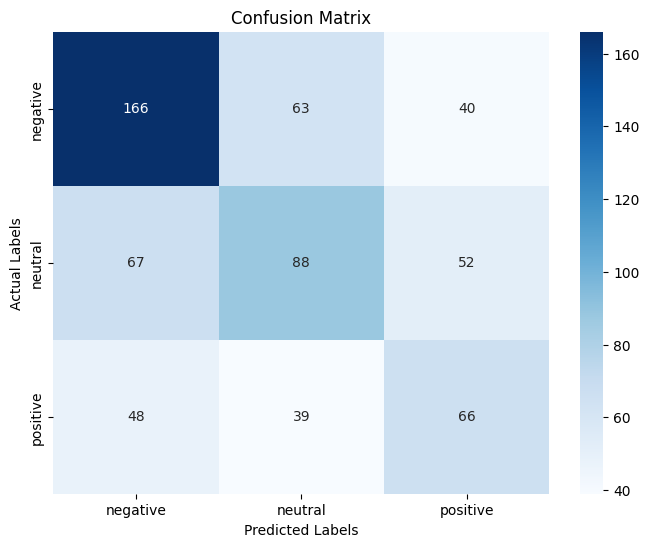

[2025-06-03 20:35:48,698][3446969155.py][line:46][INFO] Test UA: 0.4911978979045599
[2025-06-03 20:35:48,698][3446969155.py][line:46][INFO] Test UA: 0.4911978979045599
[2025-06-03 20:35:48,700][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:48,700][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:48,703][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       166       63        40
neutral         67       88        52
positive        48       39        66
[2025-06-03 20:35:48,703][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       166       63        40
neutral         67       88        52
positive        48       39        66
[2025-06-03 20:35:48,720][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:48,720][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:48,722][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   suppo

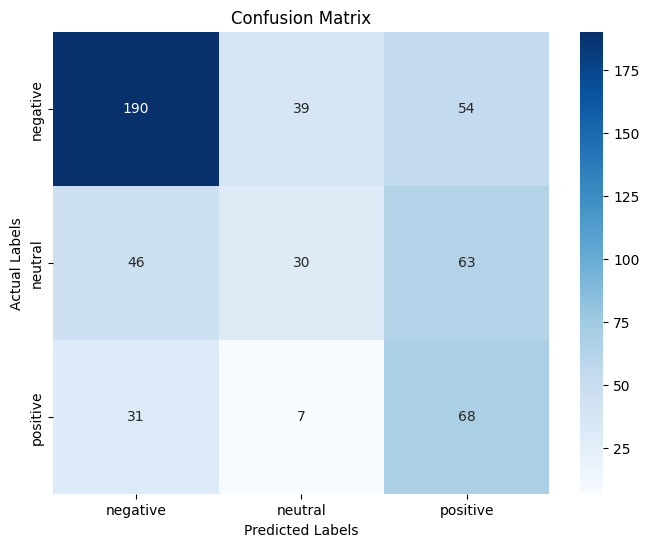

[2025-06-03 20:35:48,900][3446969155.py][line:46][INFO] Test UA: 0.5095716213215173
[2025-06-03 20:35:48,900][3446969155.py][line:46][INFO] Test UA: 0.5095716213215173
[2025-06-03 20:35:48,902][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:48,902][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:48,905][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       190       39        54
neutral         46       30        63
positive        31        7        68
[2025-06-03 20:35:48,905][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       190       39        54
neutral         46       30        63
positive        31        7        68
[2025-06-03 20:35:48,920][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:48,920][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:48,922][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   suppo

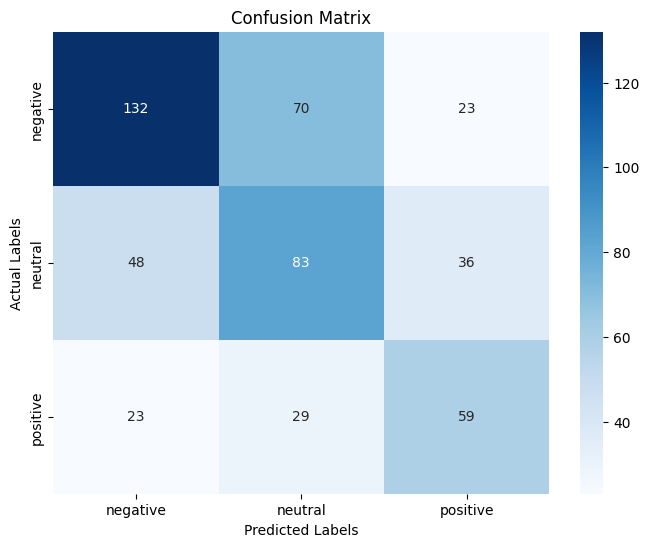

[2025-06-03 20:35:49,082][3446969155.py][line:46][INFO] Test UA: 0.5384013954073835
[2025-06-03 20:35:49,082][3446969155.py][line:46][INFO] Test UA: 0.5384013954073835
[2025-06-03 20:35:49,084][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:49,084][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:49,087][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       132       70        23
neutral         48       83        36
positive        23       29        59
[2025-06-03 20:35:49,087][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       132       70        23
neutral         48       83        36
positive        23       29        59
[2025-06-03 20:35:49,101][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:49,101][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:49,103][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   suppo

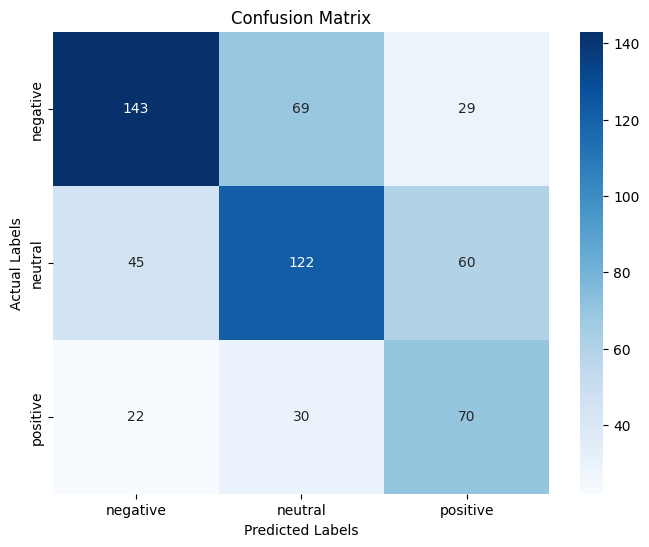

[2025-06-03 20:35:49,268][3446969155.py][line:46][INFO] Test UA: 0.5681921405248685
[2025-06-03 20:35:49,268][3446969155.py][line:46][INFO] Test UA: 0.5681921405248685
[2025-06-03 20:35:49,271][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:49,271][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:49,273][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       143       69        29
neutral         45      122        60
positive        22       30        70
[2025-06-03 20:35:49,273][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       143       69        29
neutral         45      122        60
positive        22       30        70
[2025-06-03 20:35:49,291][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:49,291][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:49,292][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   suppo

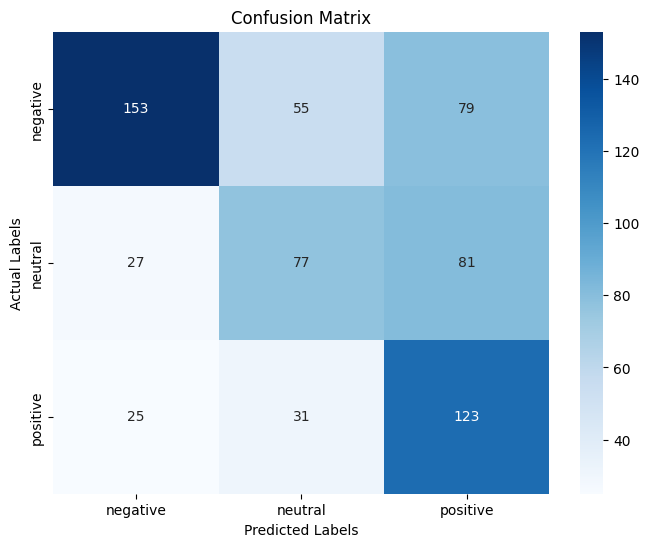

[2025-06-03 20:35:49,457][3446969155.py][line:46][INFO] Test UA: 0.5454893665004034
[2025-06-03 20:35:49,457][3446969155.py][line:46][INFO] Test UA: 0.5454893665004034
[2025-06-03 20:35:49,459][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:49,459][3446969155.py][line:48][INFO] Confusion Matrix:
[2025-06-03 20:35:49,461][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       153       55        79
neutral         27       77        81
positive        25       31       123
[2025-06-03 20:35:49,461][3446969155.py][line:49][INFO] 
          negative  neutral  positive
negative       153       55        79
neutral         27       77        81
positive        25       31       123
[2025-06-03 20:35:49,478][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:49,478][3446969155.py][line:53][INFO] Classification Report:
[2025-06-03 20:35:49,480][3446969155.py][line:54][INFO] 
              precision    recall  f1-score   suppo

In [13]:
for i in range(10):
    df = pd.read_csv(f"fold_{i}/predictions.csv")    
    calculate_accuracy(df, i)

## Calculate Per-Class averages

In [14]:
# Compute average recall for each class over 10 folds
average_positive_recall = sum(all_positive_accuracy) / 10
average_neutral_recall = sum(all_neutral_accuracy) / 10
average_negative_recall = sum(all_negative_accuracy) / 10

# Compute average F1-score for each class over 10 folds
average_positive_f1 = sum(all_positive_f1) / 10
average_neutral_f1 = sum(all_neutral_f1) / 10
average_negative_f1 = sum(all_negative_f1) / 10

# Compute overall (macro) averages across classes
overall_average_recall = (
    average_positive_recall + average_neutral_recall + average_negative_recall
) / 3
overall_average_f1 = (
    average_positive_f1 + average_neutral_f1 + average_negative_f1
) / 3

# Log the averages
logger.info(f"")
logger.info(f"------------------------ Averages ------------------------")
logger.info(f"Average Positive Recall: {average_positive_recall:.4f}")
logger.info(f"Average Neutral Recall: {average_neutral_recall:.4f}")
logger.info(f"Average Negative Recall: {average_negative_recall:.4f}")
logger.info(f"Macro Average Recall: {overall_average_recall:.4f}")
logger.info(f"")
logger.info(f"Average Positive F1-score: {average_positive_f1:.4f}")
logger.info(f"Average Neutral F1-score: {average_neutral_f1:.4f}")
logger.info(f"Average Negative F1-score: {average_negative_f1:.4f}")
logger.info(f"Macro Average F1-score: {overall_average_f1:.4f}")

[2025-06-03 20:35:49,515][1524251518.py][line:20][INFO] 
[2025-06-03 20:35:49,515][1524251518.py][line:20][INFO] 
[2025-06-03 20:35:49,516][1524251518.py][line:21][INFO] ------------------------ Averages ------------------------
[2025-06-03 20:35:49,516][1524251518.py][line:21][INFO] ------------------------ Averages ------------------------
[2025-06-03 20:35:49,518][1524251518.py][line:22][INFO] Average Positive Recall: 0.5512
[2025-06-03 20:35:49,518][1524251518.py][line:22][INFO] Average Positive Recall: 0.5512
[2025-06-03 20:35:49,520][1524251518.py][line:23][INFO] Average Neutral Recall: 0.4534
[2025-06-03 20:35:49,520][1524251518.py][line:23][INFO] Average Neutral Recall: 0.4534
[2025-06-03 20:35:49,521][1524251518.py][line:24][INFO] Average Negative Recall: 0.5884
[2025-06-03 20:35:49,521][1524251518.py][line:24][INFO] Average Negative Recall: 0.5884
[2025-06-03 20:35:49,523][1524251518.py][line:25][INFO] Macro Average Recall: 0.5310
[2025-06-03 20:35:49,523][1524251518.py][line